In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_file.csv')

In [3]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [4]:
test = pd.read_csv('test_file.csv')

In [5]:
test.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [6]:
sub = pd.read_csv('sample_submission.csv')

In [7]:
sub.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,0.068519,-0.039305
1,DVAaGErjlF,0.000000,-0.013313
2,OT9UIZm5M2,0.036084,0.037821
3,lflGp3q2Fj,-0.073611,-0.417361
4,zDYG0SoovZ,0.047111,-0.213201


In [8]:
test.shape

(37288, 9)

In [9]:
sub.shape

(5, 3)

In [10]:
train.shape

(55932, 11)

In [11]:
train.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [13]:
train.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [14]:
test.isnull().sum()

IDLink           0
Title            0
Headline         0
Source         101
Topic            0
PublishDate      0
Facebook         0
GooglePlus       0
LinkedIn         0
dtype: int64

In [15]:
train.Source.value_counts()

Bloomberg           992
Reuters             763
ABC News            645
New York Times      573
The Guardian        551
                   ... 
MSN Autos             1
Index.hr              1
L'Orient-Le Jour      1
WRDW-TV               1
Chicago Reader        1
Name: Source, Length: 4753, dtype: int64

In [16]:
test.Source.value_counts()

Bloomberg                                  740
Reuters                                    558
ABC News                                   453
New York Times                             419
MSPoweruser.com                            416
                                          ... 
CBS sports.com (blog)                        1
Golden Gate Xpress                           1
Greene County Messenger                      1
Charleston Post Courier (press release)      1
ScoopWhoop                                   1
Name: Source, Length: 3666, dtype: int64

In [17]:
#filling NA values with the most occurring categorical value.
train['Source'] = train['Source'].fillna('Bloomberg')
test['Source'] = test['Source'].fillna('Bloomberg')

In [18]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [19]:
train.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
Facebook             0
GooglePlus           0
LinkedIn             0
SentimentTitle       0
SentimentHeadline    0
dtype: int64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55932 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [21]:
# Processing the text data

In [22]:
import nltk
from nltk.corpus import stopwords,wordnet 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import punkt

In [23]:
import re

In [24]:
stop = set(stopwords.words('english'))

In [25]:
def clean(text):
  text_token = word_tokenize(text)
  filtered_text = ' '.join([w.lower() for w in text_token if w.lower() not in stop and len(w) > 2])
  filtered_text = filtered_text.replace(r"[^a-zA-Z]+", '')
  text_only = re.sub(r'\b\d+\b', '', filtered_text)
  clean_text = text_only.replace(',', '').replace('.', '').replace(':', '').replace('/','')
  return clean_text

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDLink       37288 non-null  object
 1   Title        37288 non-null  object
 2   Headline     37288 non-null  object
 3   Source       37288 non-null  object
 4   Topic        37288 non-null  object
 5   PublishDate  37288 non-null  object
 6   Facebook     37288 non-null  int64 
 7   GooglePlus   37288 non-null  int64 
 8   LinkedIn     37288 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [27]:
train['Text_T'] = train['Title'] + ' ' + train['Source'] + ' ' + train['Topic']
test['Text_T'] = test['Title'] + ' ' + test['Source'] + ' ' + test['Topic']

train['Text_H'] = train['Headline'] + ' ' + train['Source'] + ' ' + train['Topic']
test['Text_H'] = test['Headline'] + ' ' + test['Source'] + ' ' + test['Topic']

In [28]:
train['Text_T'][1]

'A Look at the Health of the Chinese Economy Bloomberg economy'

In [29]:
test['Text_T'][2]

'Microsoft’s Twitter Robot Praises Hitler, Trump & Recites Racism EURweb microsoft'

In [30]:
train['Text_H'][5]

'Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm  PRWeb microsoft'

In [38]:
test['Text_H'][3]

'central bankers managed steer world economy clear recession leaving stuck rut led troubles first place bloomberg via yahoo finance economy'

In [32]:
train['Text_T'] = [clean(x) for x in train['Text_T']]
test['Text_T'] = [clean(x) for x in test['Text_T']]

train['Text_H'] = [clean(x) for x in train['Text_H']]
test['Text_H'] = [clean(x) for x in test['Text_H']]

In [37]:
train['Text_H'][5]

' attendees expected see latest version microsoft dynamics dynamics prweb february  read full story http wwwprwebcomreleasesprweb13238571htm prweb microsoft'

In [34]:
test['Text_T'][2]

'microsoft twitter robot praises hitler trump recites racism eurweb microsoft'

In [35]:
#from wordcloud import WordCloud, STOPWORDS 

ModuleNotFoundError: No module named 'wordcloud'

In [41]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jaydeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
#!pip install wordcloud

In [44]:
from wordcloud import WordCloud, STOPWORDS

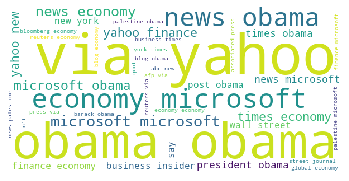

In [45]:
text = ""
for ind, row in train.iterrows():
    text += row["Text_T"] + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

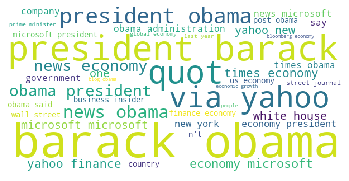

In [46]:
text = ""
for ind, row in train.iterrows():
    text += row["Text_H"] + " "
text = text.strip()

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
wordcloud.recolor(random_state=ind*312)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
train.head(3)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_T,Text_H
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...


In [ ]:
# Feature Extraction

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer(use_idf=True)

train_v_T = vectorizer.fit_transform(train['Text_T'])
test_v_T = vectorizer.transform(test['Text_T'])

vectorizer_ = TfidfVectorizer()

train_v_H = vectorizer_.fit_transform(train['Text_H'])
test_v_H = vectorizer_.transform(test['Text_H'])

In [53]:
# calculating the sentiments from the text data
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
# Subjectivity is also a float which lies in the range of [0,1]

In [56]:
#!pip install textblob

In [57]:
from textblob import TextBlob

In [58]:
train['polarity_t'] = train['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['polarity_t'] = test['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

train['subjectivity_t'] = train['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test['subjectivity_t'] = test['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [59]:
train['polarity_h'] = train['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['polarity_h'] = test['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

train['subjectivity_h'] = train['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test['subjectivity_h'] = test['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55932 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
 11  Text_T             55932 non-null  object 
 12  Text_H             55932 non-null  object 
 13  polarity_t         55932 non-null  float64
 14  subjectivity_t     55932 non-null  float64
 15  polarity_h         55932 non-null  float64
 16  subjectivity_h     559

In [61]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_T,Text_H,polarity_t,subjectivity_t,polarity_h,subjectivity_h
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...,0.0,0.0,0.000000,0.000000
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...,0.0,0.0,0.100000,0.200000
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...,0.0,0.0,0.000000,0.041667
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...,0.0,0.0,-0.166667,0.166667
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...,0.0,0.0,0.133333,0.380556


In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [63]:
encoder = LabelEncoder()

In [64]:
train['Topic'] = encoder.fit_transform(train['Topic'])


In [65]:
test['Topic'] = encoder.transform(test['Topic'])

In [66]:
total = train['Source'].to_list() + test['Source'].to_list()
total = encoder.fit_transform(total)

In [67]:
train['Source'] = encoder.transform(train['Source'])
test['Source'] = encoder.transform(test['Source'])

In [68]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_T,Text_H,polarity_t,subjectivity_t,polarity_h,subjectivity_h
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,4995,2,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...,0.0,0.0,0.000000,0.000000
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",518,0,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...,0.0,0.0,0.100000,0.200000
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",518,0,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...,0.0,0.0,0.000000,0.041667
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,3621,0,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...,0.0,0.0,-0.166667,0.166667
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,4597,0,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...,0.0,0.0,0.133333,0.380556


In [70]:
import datetime

In [71]:
# processing datetime variables

train_weekday = []
test_weekday = []

for i in train['PublishDate']:
    train_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))
    
for i in test['PublishDate']:
    test_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))

train['weekday'] = train_weekday
test['weekday'] = test_weekday

In [73]:
train['weekday']

0         Tuesday
1        Saturday
2        Saturday
3          Sunday
4          Sunday
           ...   
55927     Tuesday
55928     Tuesday
55929     Tuesday
55930     Tuesday
55931     Tuesday
Name: weekday, Length: 55932, dtype: object

In [74]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_T,Text_H,polarity_t,subjectivity_t,polarity_h,subjectivity_h,weekday
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,4995,2,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...,0.0,0.0,0.000000,0.000000,Tuesday
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",518,0,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...,0.0,0.0,0.100000,0.200000,Saturday
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",518,0,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...,0.0,0.0,0.000000,0.041667,Saturday
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,3621,0,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...,0.0,0.0,-0.166667,0.166667,Sunday
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,4597,0,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...,0.0,0.0,0.133333,0.380556,Sunday


In [75]:
# convert weekday to 0-6

train['weekday'] = train['weekday'].map({'Monday': 0,
                                        'Tuesday': 1,
                                        'Wednesday': 2,
                                        'Thursday': 3,
                                        'Friday': 4,
                                        'Saturday': 5,
                                        'Sunday': 6})
test['weekday'] = test['weekday'].map({'Monday': 0,
                                        'Tuesday': 1,
                                        'Wednesday': 2,
                                        'Thursday': 3,
                                        'Friday': 4,
                                        'Saturday': 5,
                                        'Sunday': 6})

In [76]:
train['weekday']

0        1
1        5
2        5
3        6
4        6
        ..
55927    1
55928    1
55929    1
55930    1
55931    1
Name: weekday, Length: 55932, dtype: int64

In [77]:
# Processig time format
train["hour"] = train["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])
test["hour"] = test["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])

In [80]:
train['hour'].value_counts()

00    4698
16    3053
14    2934
15    2854
17    2821
13    2724
18    2670
12    2468
19    2439
11    2380
21    2312
20    2290
10    2261
22    2252
23    2052
09    2039
08    1910
05    1837
01    1825
06    1805
07    1794
02    1617
04    1479
03    1418
Name: hour, dtype: int64

Text(0, 0.5, 'SentimentTitle')

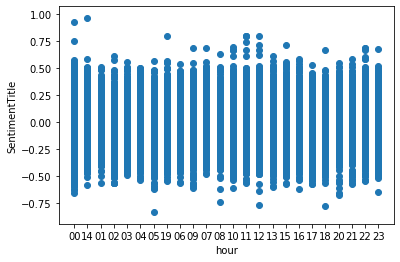

In [81]:
plt.scatter(train['hour'], train['SentimentTitle'])
plt.xlabel('hour')
plt.ylabel('SentimentTitle')

Text(0, 0.5, 'SentimentHeadline')

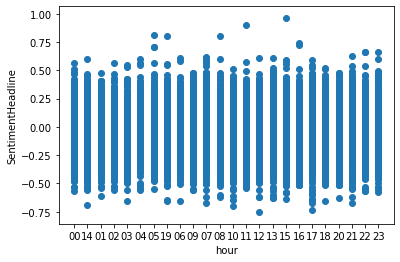

In [82]:
plt.scatter(train['hour'], train['SentimentHeadline'])
plt.xlabel('hour')
plt.ylabel('SentimentHeadline')

In [83]:
# Number of words in the Title 
train["num_words_t"] = train["Text_T"].apply(lambda x: len(str(x).split()))
test["num_words_t"] = test["Text_T"].apply(lambda x: len(str(x).split()))

# Number of unique words in the Title 
train["num_unique_words_t"] = train["Text_T"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words_t"] = test["Text_T"].apply(lambda x: len(set(str(x).split())))

# Number of characters in the Title 
train["num_chars_t"] = train["Text_T"].apply(lambda x: len(str(x)))
test["num_chars_t"] = test["Text_T"].apply(lambda x: len(str(x)))

# Average length of the words in the Title 
train["mean_word_len_t"] = train["Text_T"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len_t"] = test["Text_T"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [84]:
# Number of words in the Headline 
train["num_words_h"] = train["Text_H"].apply(lambda x: len(str(x).split()))
test["num_words_h"] = test["Text_H"].apply(lambda x: len(str(x).split()))

# Number of unique words in the Headline 
train["num_unique_words_h"] = train["Text_H"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words_h"] = test["Text_H"].apply(lambda x: len(set(str(x).split())))

# Number of characters in the Headline 
train["num_chars_h"] = train["Text_H"].apply(lambda x: len(str(x)))
test["num_chars_h"] = test["Text_H"].apply(lambda x: len(str(x)))

# Average length of the words in the Headline 
train["mean_word_len_h"] = train["Text_H"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len_h"] = test["Text_H"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IDLink              55932 non-null  object 
 1   Title               55932 non-null  object 
 2   Headline            55932 non-null  object 
 3   Source              55932 non-null  int32  
 4   Topic               55932 non-null  int32  
 5   PublishDate         55932 non-null  object 
 6   Facebook            55932 non-null  int64  
 7   GooglePlus          55932 non-null  int64  
 8   LinkedIn            55932 non-null  int64  
 9   SentimentTitle      55932 non-null  float64
 10  SentimentHeadline   55932 non-null  float64
 11  Text_T              55932 non-null  object 
 12  Text_H              55932 non-null  object 
 13  polarity_t          55932 non-null  float64
 14  subjectivity_t      55932 non-null  float64
 15  polarity_h          55932 non-null  float64
 16  subj

In [86]:
scaler = StandardScaler()

In [87]:
cols = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_t', 'num_unique_words_t', 'num_chars_t', 'mean_word_len_t',
        'num_words_h', 'num_unique_words_h', 'num_chars_h', 'mean_word_len_h', 'hour', 'weekday']


In [88]:
for col in cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [89]:
cols_ts = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_t', 'num_unique_words_t', 'num_chars_t',
          'mean_word_len_t', 'polarity_t', 'subjectivity_t', 'hour', 'weekday']

train_X1 = train[cols_ts]
test_X1 = test[cols_ts]

In [90]:
cols_hs = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_h', 'num_unique_words_h', 'num_chars_h',
           'mean_word_len_h', 'polarity_h', 'subjectivity_h', 'hour', 'weekday']

train_X2 = train[cols_hs]
test_X2 = test[cols_hs]

In [91]:
train_X1.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,num_words_t,num_unique_words_t,num_chars_t,mean_word_len_t,polarity_t,subjectivity_t,hour,weekday
0,1.257700,0.841443,-0.184044,-0.262649,-0.199608,-0.258641,-0.304150,-0.572375,-0.614019,0.0,0.0,-1.699073,-0.795924
1,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-1.668384,-1.721441,-1.629468,0.275056,0.0,0.0,-1.699073,1.338369
2,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-1.198470,-1.249010,-1.034853,0.329490,0.0,0.0,-1.699073,1.338369
3,0.468412,-1.108773,-0.184044,-0.262649,-0.199608,-1.668384,-1.249010,-2.224083,-1.439590,0.0,0.0,-1.699073,1.871942
4,1.029071,-1.108773,-0.184044,-0.262649,-0.199608,1.151102,1.113140,1.013265,-0.296492,0.0,0.0,-1.699073,1.871942


In [92]:
train_X2.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,num_words_h,num_unique_words_h,num_chars_h,mean_word_len_h,polarity_h,subjectivity_h,hour,weekday
0,1.257700,0.841443,-0.184044,-0.262649,-0.199608,-0.285642,-0.525951,-0.490121,-1.059021,0.000000,0.000000,-1.699073,-0.795924
1,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-0.285642,-0.231728,-0.317229,-0.175037,0.100000,0.200000,-1.699073,1.338369
2,-1.314091,-1.108773,-0.184044,-0.262649,-0.199608,-0.413005,-0.673063,-0.299939,0.620549,0.000000,0.041667,-1.699073,1.338369
3,0.468412,-1.108773,-0.184044,-0.262649,-0.199608,0.096447,0.062496,0.305186,0.845965,-0.166667,0.166667,-1.699073,1.871942
4,1.029071,-1.108773,-0.184044,-0.262649,-0.199608,0.223810,0.209608,0.391632,0.620549,0.133333,0.380556,-1.699073,1.871942


In [93]:
print(np.shape(train_X1))
print(np.shape(test_X1))

(55932, 13)
(37288, 13)


In [94]:
print(np.shape(train_X2))
print(np.shape(test_X2))

(55932, 13)
(37288, 13)


In [96]:
from scipy.sparse import hstack, csr_matrix

In [97]:
train_X_Title = hstack([train_v_T, csr_matrix(train_X1.values)])
test_X_Title = hstack([test_v_T, csr_matrix(test_X1.values)])
y1 = train['SentimentTitle']

train_X_Headline = hstack([train_v_H, csr_matrix(train_X2.values)])
test_X_Headline = hstack([test_v_H, csr_matrix(test_X2.values)])
y2 = train['SentimentHeadline']

In [98]:
#train test spitting
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(train_X_Title, y1, test_size=0.20, random_state=42)


In [102]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR

In [103]:
#sentiment title

clf1 = LinearSVR(C=0.2)
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)

mae1 = mean_absolute_error(y_pred1, y_test)


C:\Users\Jaydeep\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [110]:
print(mae1)
print('score:', 1 - mae1)

0.056684298288432904
score: 0.9433157017115671


In [107]:
#sentiment headline

X_train1, X_test1, y_train1, y_test1 = train_test_split(train_X_Headline, y2, test_size=0.20, random_state=42)

In [108]:
clf2 = LinearSVR(C=0.1)
clf2.fit(X_train1, y_train1)

y_pred2 = clf2.predict(X_test1)

mae2 = mean_absolute_error(y_pred2, y_test1)

C:\Users\Jaydeep\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [111]:
print(mae2)
print('score:', 1 - mae2)

0.0708047330353799
score: 0.9291952669646201


In [112]:
# predicting on test data set

title = clf1.predict(test_X_Title)
headline = clf2.predict(test_X_Headline)

In [114]:
test_id = test['IDLink']

In [115]:
df = pd.DataFrame()
df['IDLink'] = test_id
df['SentimentTitle'] = title
df['SentimentHeadline'] = headline
df.to_csv('submission.csv', index=False)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             37288 non-null  object 
 1   SentimentTitle     37288 non-null  float64
 2   SentimentHeadline  37288 non-null  float64
dtypes: float64(2), object(1)
memory usage: 874.1+ KB


In [118]:
df.shape

(37288, 3)